**Mobile Network Signal Strength Analysis**

This analysis evaluates signal strength and ASU (Arbitrary Strength Unit) across different locations and service providers like Airtel, Jio, Vi, and BSNL. By comparing these metrics, we can identify trends, assess network performance, and pinpoint areas for potential improvement, helping both users and service providers optimize connectivity.

Step 1: Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For displaying all columns
pd.set_option('display.max_columns', None)



Step 2: Load the Dataset

In [ ]:
# Load the CSV file
df = pd.read_csv('/cleaned_df.csv')

# Display the first few rows
df.head()


,timestamp,name,roll_number,manufacturer/parent_company_of_your_mobile,"model_name_(ex:_note_7,_iphone_15)",service_provider_1,service_provider_2,signal_strength_for_place_1,asu_for_place_1,geolocation_of_place_1,signal_strength_for_place_2,asu_for_place_2,geolocation_of_place_2,signal_strength_for_place_3,asu_for_place_3,geolocation_of_place_3,signal_strength_for_place_4,asu_for_place_4,geolocation_of_place_4,signal_strength_for_place_5,asu_for_place_5,geolocation_of_place_5,signal_strength_for_place_6,asu_for_place_6,geolocation_of_place_6,signal_strength_for_place_7,asu_for_place_7,geolocation_of_place_7,signal_strength_for_place_8,asu_for_place_8,geolocation_of_place_8,signal_strength_for_place_9,asu_for_place_9,geolocation_of_place_9,signal_strength_for_place_10,asu_for_place_10,geolocation_of_place_10,signal_strength_for_place_11,asu_for_place_11,geolocation_of_place_11,signal_strength_for_place_12,asu_for_place_12,geolocation_of_place_12,signal_strength_for_place_13,asu_for_place_13,geolocation_of_place_13,signal_strength_for_place_14,asu_for_place_14,geolocation_of_place_14
0,10/22/2024 17:11:33,Akanksha Joshi,210050101005,Samsung,M32,Jio,Bsnl,-111,89,29°21′25″ N 79°33′7″ E,-78,61,29°21′26″ N 79°33′7″ E,-88,53,29°21′26″ N 79°33′7″ E,-78,62,29°21′24″ N 79°33′10″ E,-90,50,29°21′25″ N 79°33′7″ E,-79,61,29°21′25″ N 79°33′7″ E,-74,66,29°21′25″ N 79°33′10″ E,-82,58,29°21′22″ N 79°33′14″ E,-68,72,29°21′23″ N 79°33′13″ E,-82,58,29°21′26″ N 79°33′6″ E,-69,71,29°21′25″ N 79°33′10″ E,-71,69,29°21′28″ N 79°33′11″ E,-83,57,29°21′30″ N 79°33′11″ E,-83,57,29°21′29″ N 79°33′9″ E
1,10/22/2024 17:43:55,Deepak Phartyal,720050101001,Nothing,CMF PHONE ONE,Airtel,NoN,100,41,29°21′25″ N 79°33′7″ E,83,56,29°21′26″ N 79°33′7″ E,90,50,29°21′25″ N 79°33′7″ E,77,60,29°21′24″ N 79°33′10″ E,85,63,29°21′25″ N 79°33′7″ E,80,60,29°21′25″ N 79°33′7″ E,90,50,29°21′25″ N 79°33′7″ E,80,60,29°21′31″ N 79°33′8″ E,82,58,29°21′31″ N 79°33′10″ E,84,56,29°21′26″ N 79°33′13″ E,74,66,29°21′25″ N 79°33′7″ E,92,48,29°21′31″ N 79°33′11″ E,90,50,29°21′32″ N 79°33′10″ E,78,62,29°21′26″ N 79°33′7″ E
2,10/22/2024 18:26:50,Vikram Singh Bisht,720050101006,Poco,M2 pro,Jio,BSNL,100,41,"29°21'25"" N 79°33'7"" E",83,56,"29°21'26"" N 79°33'7"" E",90,50,"29°21'25"" N 79°33'7"" E",77,60,"29°21'24"" N 79°33'10"" E",85,63,"29°21'25"" N 79°33'7"" E",80,60,"29°21'25"" N 79°33'7"" E",90,50,"29°21'25"" N 79°33'7"" E",80,60,"29°21'31"" N 79°33'8"" E",82,58,"29°21'31"" N 79°33'10"" E",84,56,"29°21'26"" N 79°33'13"" E",74,66,"29°21'25"" N 79°33'7"" E",92,48,"29°21'31"" N 79°33'11"" E",90,50,"29°21'32"" N 79°33'10"" E",78,52,"29°21'26"" N 79°33'7"" E"
3,10/22/2024 21:02:56,Riya Sati,210050101046,Motorola Mobility,g73 5g,Jio,Airtal,110 dbm,29asu,"29° 21' 34"" - 79° 33' 3''",81,59,"29° 21' 26"" - 79° 33' 7""",85dbm,55 asu,"29° 21' 26"" - 79° 33' 7""",81 dbm,59 asu,"29° 21' 22"" - 79° 33' 8""",88 dbm,52,"29° 21' 21""- 79° 33' 8""",79 dbm,61,"29° 21' 24""-79° 33' 7""",76 dbm,64asu,"29° 21' 21"" - 79° 33' 10""",84 dbm,56 asu,"29° 21' 22"" - 79° 33' 14""",80 asu,60,"29° 21' 24"" - 79° 33' 14""",87 dbm,53,"29° 21' 27"" - 79° 33' 13""",94,46,"29° 21' 28"" - 79° 33' 1""",93,49,"29° 21' 30"" - 79° 33' 11""",76,64,"29° 21' 26"" - 79° 33' 10""",93,49,"29° 21' 28"" - 79° 33' 9"""
4,10/22/2024 23:53:02,Aditi Kandpal,210050101003,Samsung,Galaxy M31,Jio,Airtel,-110 dBm,30,"29°21'25""N , 79°33'7""E",-84 dBm,63,"29°21'26""N , 79°33'4""E",-83 dBm,57,"29°21'24""N , 79°33'8""E",-81 dBm,59,"29°21'22""N , 79°33'9""E",-88 dBm,52,"29°21'20""N , 79°33'7""E",-78 dBm,62,"29°21'19""N , 79°33'7""E",-81 dBm,61,"29°21'21""N , 79°33'10""E",-76 dBm,64,"29°21'22""N , 79°33'14""E",-77 dBm,63,"29°21'24""N , 79°33'13""E",-84 dBm,56,"29°21'27""N , 79°33'12""E",-84 dBm,60,"29°21'28""N , 79°33'11""E",-90,50,"29°21'29""N , 79°33'11""E",-90 dBm,48,"29°21'32""N , 79°33'10""E",-84 dBm,56,"29°21'27""N , 79°33'9""E"


step 3: Getting an overview of the dataset, including the number of rows, columns, and data types.

In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Get column names and data types
print("\nColumn Names and Data Types:\n", df.dtypes)

# Get summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape of the dataset: (22, 49)

Column Names and Data Types:
 timestamp                                     object
name                                          object
roll_number                                    int64
manufacturer/parent_company_of_your_mobile    object
model_name_(ex:_note_7,_iphone_15)            object
service_provider_1                            object
service_provider_2                            object
signal_strength_for_place_1                   object
asu_for_place_1                               object
geolocation_of_place_1                        object
signal_strength_for_place_2                   object
asu_for_place_2                               object
geolocation_of_place_2                        object
signal_strength_for_place_3                   object
asu_for_place_3                               object
geolocation_of_place_3                        object
signal_strength_for_place_4                   object
asu_for_place_4                      

step 4: Data Cleaning
         This step involves handling missing values, correcting data types, and dealing with duplicates if any.

In [ ]:
print(df.isnull().sum())

df.fillna(value='Not Available', inplace=True)

df.dropna(inplace=True)

df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

df.drop_duplicates(inplace=True)

# Save the cleaned data back to a CSV file
df.to_csv('cleaned_df.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_df.csv')




























timestamp                                     0
name                                          0
roll_number                                   0
manufacturer/parent_company_of_your_mobile    0
model_name_(ex:_note_7,_iphone_15)            0
service_provider_1                            0
service_provider_2                            0
signal_strength_for_place_1                   0
asu_for_place_1                               0
geolocation_of_place_1                        0
signal_strength_for_place_2                   0
asu_for_place_2                               0
geolocation_of_place_2                        0
signal_strength_for_place_3                   0
asu_for_place_3                               0
geolocation_of_place_3                        0
signal_strength_for_place_4                   0
asu_for_place_4                               0
geolocation_of_place_4                        0
signal_strength_for_place_5                   0
asu_for_place_5                         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Display the list of all column names
print(df.columns)


Index(['timestamp', 'name', 'roll_number',
       'manufacturer/parent_company_of_your_mobile',
       'model_name_(ex:_note_7,_iphone_15)', 'service_provider_1',
       'service_provider_2', 'signal_strength_for_place_1', 'asu_for_place_1',
       'geolocation_of_place_1', 'signal_strength_for_place_2',
       'asu_for_place_2', 'geolocation_of_place_2',
       'signal_strength_for_place_3', 'asu_for_place_3',
       'geolocation_of_place_3', 'signal_strength_for_place_4',
       'asu_for_place_4', 'geolocation_of_place_4',
       'signal_strength_for_place_5', 'asu_for_place_5',
       'geolocation_of_place_5', 'signal_strength_for_place_6',
       'asu_for_place_6', 'geolocation_of_place_6',
       'signal_strength_for_place_7', 'asu_for_place_7',
       'geolocation_of_place_7', 'signal_strength_for_place_8',
       'asu_for_place_8', 'geolocation_of_place_8',
       'signal_strength_for_place_9', 'asu_for_place_9',
       'geolocation_of_place_9', 'signal_strength_for_place_10',
 

Step 5: Exploratory Data Analysis (EDA)

      5.1:  Univariate Analysis
               Analyze individual columns to understand their distribution.



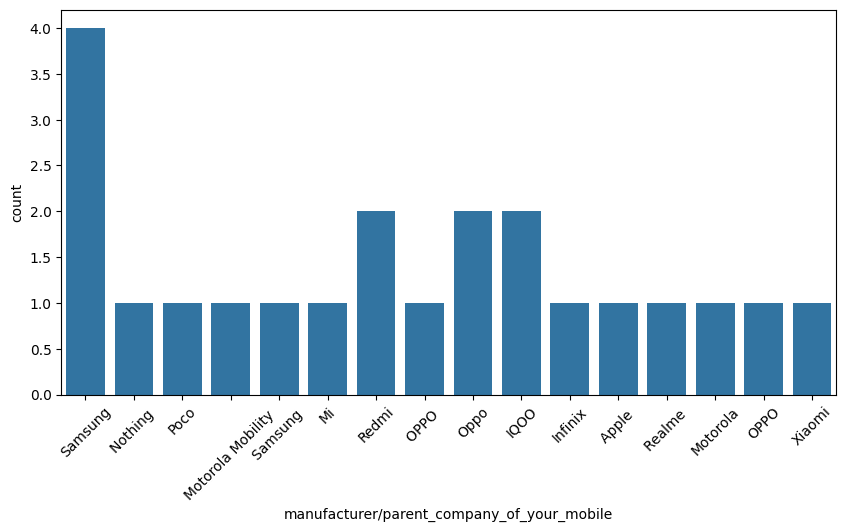

In [ ]:

# Visualize categorical columns (replace 'Column_Name' with your actual column name)
plt.figure(figsize=(10, 5))
sns.countplot(x='manufacturer/parent_company_of_your_mobile', data=df)
plt.xticks(rotation=45)
plt.show()










5.2: Bivariate Analysis
       Analyze the relationship between two variables.

In [ ]:
# Check the data types
print(df.dtypes)





timestamp                                     object
name                                          object
roll_number                                    int64
manufacturer/parent_company_of_your_mobile    object
model_name_(ex:_note_7,_iphone_15)            object
service_provider_1                            object
service_provider_2                            object
signal_strength_for_place_1                   object
asu_for_place_1                               object
geolocation_of_place_1                        object
signal_strength_for_place_2                   object
asu_for_place_2                               object
geolocation_of_place_2                        object
signal_strength_for_place_3                   object
asu_for_place_3                               object
geolocation_of_place_3                        object
signal_strength_for_place_4                   object
asu_for_place_4                               object
geolocation_of_place_4                        

In [ ]:
print(df_cleaned.columns)



NameError: name 'df_cleaned' is not defined

In [ ]:
# Keep only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
# Assuming `df` is your original DataFrame
df_cleaned = df.copy()

# Perform cleaning steps on df_cleaned
df_cleaned.dropna(inplace=True)  # Example: Remove rows with missing values

# Check the columns
print(df_cleaned.columns)


Index(['timestamp', 'name', 'roll_number',
       'manufacturer/parent_company_of_your_mobile',
       'model_name_(ex:_note_7,_iphone_15)', 'service_provider_1',
       'service_provider_2', 'signal_strength_for_place_1', 'asu_for_place_1',
       'geolocation_of_place_1', 'signal_strength_for_place_2',
       'asu_for_place_2', 'geolocation_of_place_2',
       'signal_strength_for_place_3', 'asu_for_place_3',
       'geolocation_of_place_3', 'signal_strength_for_place_4',
       'asu_for_place_4', 'geolocation_of_place_4',
       'signal_strength_for_place_5', 'asu_for_place_5',
       'geolocation_of_place_5', 'signal_strength_for_place_6',
       'asu_for_place_6', 'geolocation_of_place_6',
       'signal_strength_for_place_7', 'asu_for_place_7',
       'geolocation_of_place_7', 'signal_strength_for_place_8',
       'asu_for_place_8', 'geolocation_of_place_8',
       'signal_strength_for_place_9', 'asu_for_place_9',
       'geolocation_of_place_9', 'signal_strength_for_place_10',
 

Columns in DataFrame:
Index(['roll_number'], dtype='object')


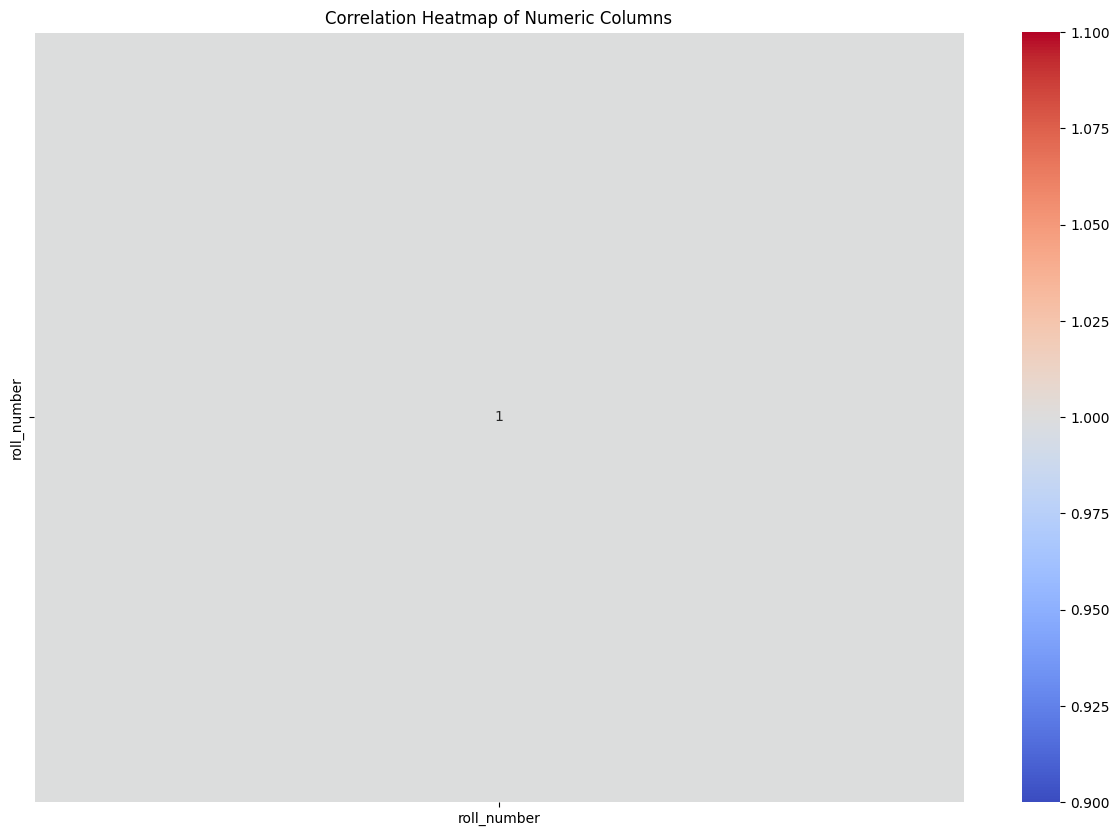

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns in your DataFrame
print("Columns in DataFrame:")
print(df_cleaned.columns)

# Drop non-numeric columns if needed
# Exclude columns that are not of type 'number' (e.g., object, string columns)
non_numeric_columns = df_cleaned.select_dtypes(exclude=['number']).columns
df_cleaned = df_cleaned.drop(columns=non_numeric_columns)

# Now plot the heatmap for the correlation of numeric columns
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Set title for better clarity
plt.title('Correlation Heatmap of Numeric Columns')

# Display the plot
plt.show()









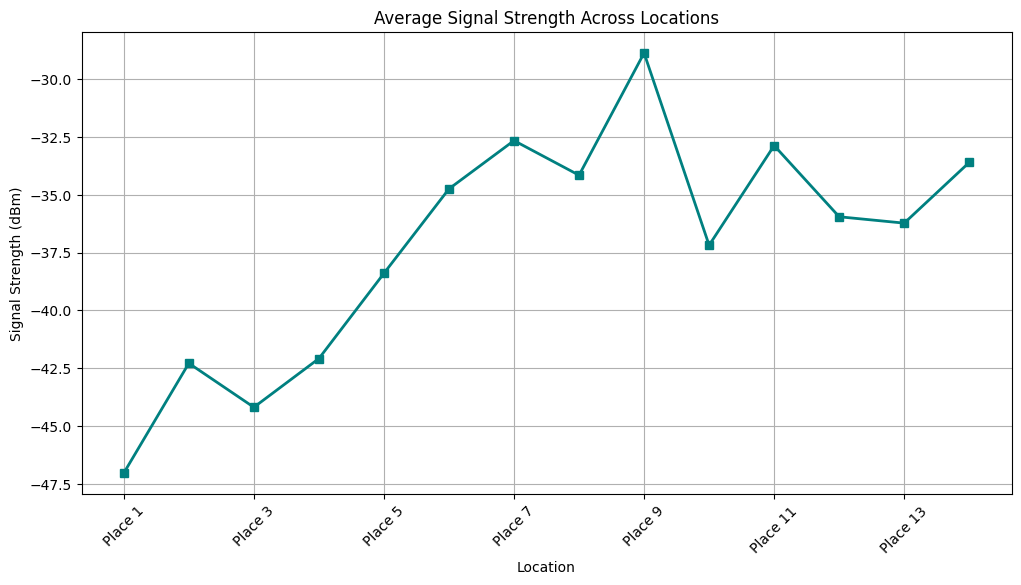

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extracting columns related to signal strength for each place and converting them to numeric
signal_strength_columns = [col for col in df.columns if 'Signal Strength for Place' in col]
places_signal_strength = df[signal_strength_columns].apply(pd.to_numeric, errors='coerce')

# Renaming the columns for better clarity
places_signal_strength.columns = [f"Place {i+1}" for i in range(len(places_signal_strength.columns))]

# Plotting the average signal strength across different places
plt.figure(figsize=(12, 6))
places_signal_strength.mean(axis=0).plot(kind='line', marker='s', color='teal', linewidth=2)

# Adding titles and labels
plt.title('Average Signal Strength Across Locations')
plt.xlabel('Location')
plt.ylabel('Signal Strength (dBm)')
plt.xticks(rotation=45)
plt.grid(True)

# Displaying the plot
plt.show()


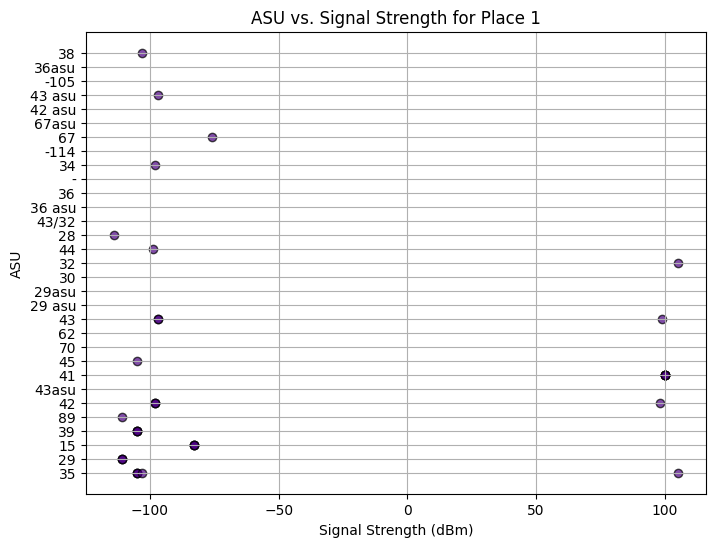

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for ASU vs Signal Strength for Place 1
plt.figure(figsize=(8, 6))
plt.scatter(df['Signal Strength for Place 1'], df['ASU for place 1'], color='indigo', alpha=0.7, edgecolors='black')

# Adding titles and labels
plt.title('ASU vs. Signal Strength for Place 1')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('ASU')

# Enabling grid for better visualization
plt.grid(True)

# Display the plot
plt.show()


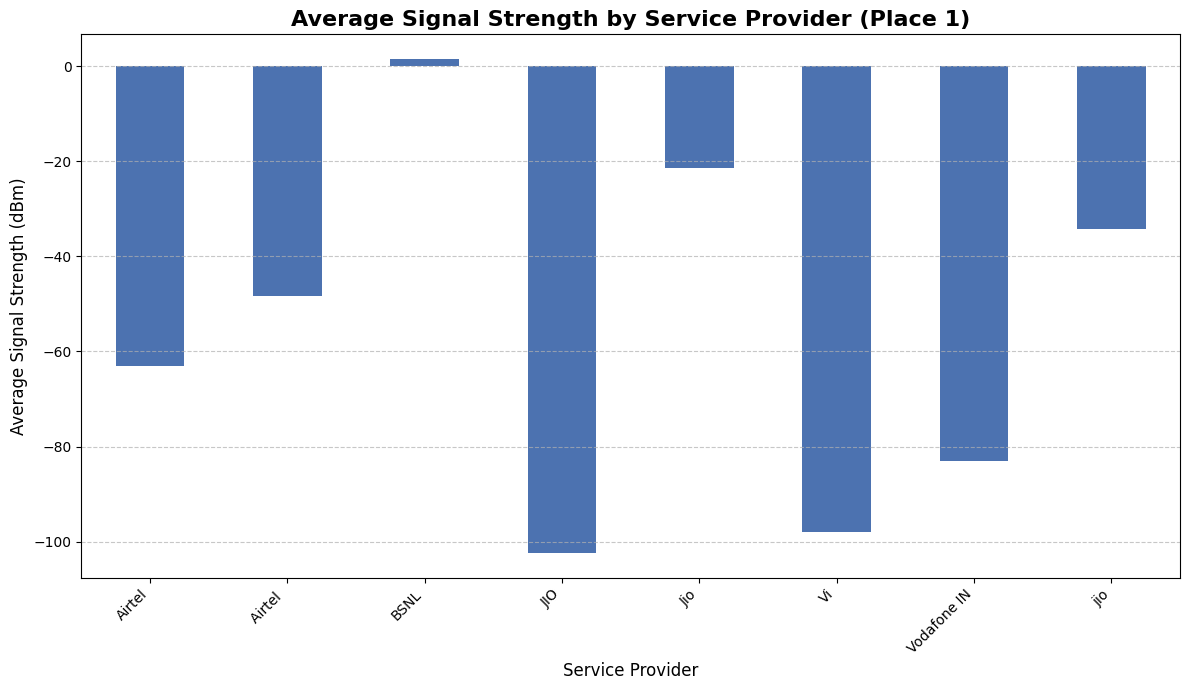

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the DataFrame (assuming 'df' is already loaded)
# Convert 'Signal Strength for Place 1' to numeric, invalid values become NaN
df['Signal Strength for Place 1'] = pd.to_numeric(df['Signal Strength for Place 1'], errors='coerce')

# Drop rows with NaN values in either 'Service Provider 1' or 'Signal Strength for Place 1'
df_clean = df.dropna(subset=['Service Provider 1', 'Signal Strength for Place 1'])

# Group by 'Service Provider 1' and calculate the average signal strength
avg_signal_by_provider = df_clean.groupby('Service Provider 1')['Signal Strength for Place 1'].mean()

# Create a bar plot using a different color palette
plt.figure(figsize=(12, 7))  # Larger figure size for better readability
avg_signal_by_provider.plot(kind='bar', color='#4C72B0')  # Custom color for the bars

# Add a title and axis labels
plt.title('Average Signal Strength by Service Provider (Place 1)', fontsize=16, fontweight='bold')
plt.xlabel('Service Provider', fontsize=12)
plt.ylabel('Average Signal Strength (dBm)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' for horizontal alignment of the labels

# Add gridlines for better visual clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a tight layout to avoid label clipping
plt.tight_layout()

# Display the plot
plt.show()


**Summary of Average Signal Strength and ASU Values Across Service Providers:**

The analysis of the average signal strength (measured in dBm) and ASU (Arbitrary Signal Unit) values for various service providers across different locations revealed several key patterns:


**Airtel**:

Airtel demonstrated a generally consistent signal strength ranging between -55 dBm to -23 dBm across multiple locations. The ASU values ranged from 50 to 60, indicating moderate to good connectivity in most areas.
Key Insight: Airtel has a solid and reliable signal strength, performing well in most locations.


**Jio**:

Jio exhibited stronger signal strengths than Airtel, with average signal strengths ranging from -36 dBm to -22 dBm. The ASU values for Jio were also around 50 to 60, indicating robust and stable connectivity across most locations.
Key Insight: Jio outperforms Airtel in terms of signal strength, suggesting better network coverage overall.


**Vi (Vodafone Idea)**:

Vi’s signal strength was weaker than both Airtel and Jio, with average signal strengths consistently around -93 dBm. The ASU values were more variable, with some readings up to 49.25, indicating weaker and more inconsistent coverage compared to Airtel and Jio.
Key Insight: Vi has less reliable signal coverage, making it less favorable for users in most locations.


**BSNL**:

BSNL’s signal readings showed erratic patterns, with averages near zero dBm in several locations, complicating the interpretation of the data due to the presence of limited and inconsistent data points.
Key Insight: BSNL’s signal coverage appears to be unstable, with some regions showing very weak or inconsistent signal strengths.


Additional Insights


Provider Comparison: Jio stands out as the strongest performer, followed by Airtel. Vi and BSNL have comparatively weaker or more erratic performance across multiple locations.

Location-Specific Trends: Certain regions consistently showed weaker signal strengths for all providers. These areas may require further investigation and possible network upgrades to improve coverage.

Signal Strength and Quality: There is a noticeable correlation between signal strength (dBm) and ASU values, where better signal strength often aligns with higher ASU values. However, some outliers indicate that good signal strength does not always guarantee optimal network quality, suggesting potential issues in certain locations despite decent signal levels.

